# Mandelbrot 

Some functions that demonstrate the use of multiprocessing and polls in Python.

The function mandelbrotCalcSet reports processing time. This allows the impact of pool size and image size on processing to be assessed. 

The algorithm is based on the pseudocode on the Wikipedia page https://en.wikipedia.org/wiki/Mandelbrot_set

In [2]:
import time
import multiprocessing
import matplotlib.pyplot as plt
from functools import partial
%matplotlib inline

pool_size = 1 # the number of processes in the poll - this can be changed later. 

def mandelbrotCalcSet(h, w, max_iteration = 1000):
    tp1 = time.time()
    #make a helper function that better supports pool.map by using only 1 var
    partialCalcRow = partial(mandelbrotCalcRow, h=h, w=w, max_iteration = max_iteration)
 
    pool =multiprocessing.Pool(processes=pool_size) #creates a pool of process, controls worksers
    #the pool.map only accepts one iterable, so use the partial function
    #so that we only need to deal with one variable.
    mandelImg = pool.map(partialCalcRow, range(h)) # Build the image a row at a time.
    
    pool.close() #we are not adding any more processes
    pool.join() #tell it to wait until all threads are done before going on
    
    print("Overall Time:", int(time.time()-tp1))
    return mandelImg

def mandelbrotCalcRow(yPos, h, w, max_iteration = 1000):
    y0 = yPos * (2/float(h)) - 1 #rescale to -1 to 1
    row = []
    for xPos in range(w):
        x0 = xPos * (3.5/float(w)) - 2.5 #rescale to -2.5 to 1
        iteration, z = 0, 0 + 0j
        c = complex(x0, y0)
        while abs(z) < 2 and iteration < max_iteration:
            z = z**2 + c
            iteration += 1
        row.append(iteration)
 
    return row


Overall Time: 9


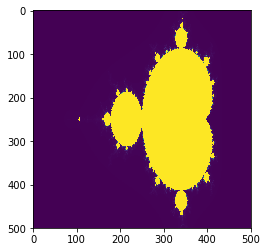

In [4]:
pool_size = 2
mandelImg = mandelbrotCalcSet(500, 500, 1000)
plt.imshow(mandelImg)
plt.savefig('mandelimg.png')

Code from Timothy Wiseman's blog https://timothyawiseman.wordpress.com/2012/12/21/a-really-simple-multiprocessing-python-example/